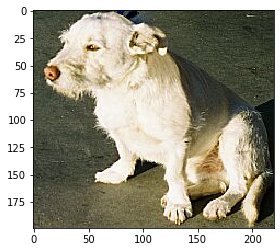

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [40]:
print(img_array) 


[[[ 58  74  63]
  [ 49  65  54]
  [ 58  74  63]
  ...
  [ 31  45  39]
  [ 33  47  41]
  [ 34  48  42]]

 [[ 58  74  63]
  [ 46  62  51]
  [ 53  69  58]
  ...
  [ 33  47  41]
  [ 37  51  45]
  [ 40  54  48]]

 [[ 45  61  50]
  [ 36  52  41]
  [ 50  66  55]
  ...
  [ 28  42  36]
  [ 32  46  40]
  [ 34  48  42]]

 ...

 [[ 82 100 101]
  [ 70  88  89]
  [ 61  79  80]
  ...
  [ 24  49  51]
  [ 38  61  63]
  [ 56  81  83]]

 [[ 76  94  95]
  [ 86 104 105]
  [ 84 102 103]
  ...
  [ 50  73  75]
  [ 55  78  80]
  [ 64  87  89]]

 [[ 81  96  98]
  [ 80  95  97]
  [ 65  80  82]
  ...
  [ 58  79  81]
  [ 54  75  77]
  [ 55  76  78]]]


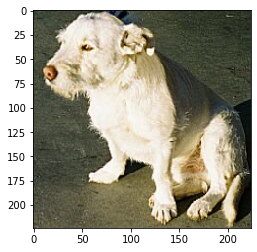

In [42]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

 96%|█████████▌| 11996/12501 [00:22<00:00, 547.83it/s]

In [28]:
import random

random.shuffle(training_data)

In [29]:
for sample in training_data[:10]:
    print(sample[1])

In [30]:
X = []
y = []


In [31]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [32]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()






In [17]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


array([[[ 77],
        [ 85],
        [ 84],
        ...,
        [ 43],
        [ 56],
        [ 64]],

       [[ 77],
        [ 86],
        [ 83],
        ...,
        [ 92],
        [125],
        [129]],

       [[ 76],
        [ 87],
        [ 89],
        ...,
        [ 97],
        [136],
        [135]],

       ...,

       [[ 65],
        [ 86],
        [ 63],
        ...,
        [ 46],
        [ 48],
        [ 34]],

       [[ 61],
        [ 67],
        [ 71],
        ...,
        [ 56],
        [ 44],
        [ 38]],

       [[ 62],
        [ 59],
        [ 82],
        ...,
        [ 57],
        [ 41],
        [ 49]]], dtype=uint8)